# Project 1: fys-stk4155
## Part a) 
### (Kode fra oppgaveteksten)

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

In [18]:
# Need to make sure this works when y, y_hat and y_tilde are matrices.

# Creating a R2-square fuction:
def R2(y, y_predict):
    C = y-y_predict
    val = sum(sum((y-y_predict))**2)/sum(sum((y-np.mean(y))**2))
    return 1 - val

# Creating a mean square error function:
def MSE(y, y_predict):
    C = y-y_predict
    [n, m] = C.shape
    return sum(sum((C)**2))/(n*m)


def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [19]:
def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

(20, 20)


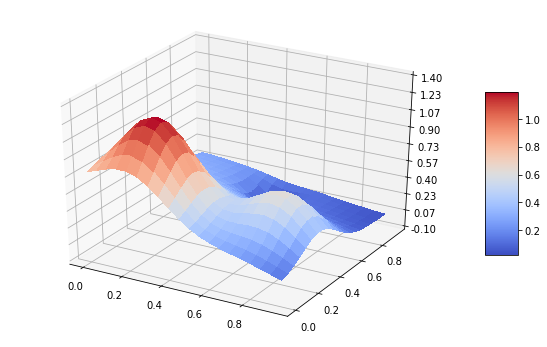

In [20]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)
print(z.shape)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [21]:
# Initializing X-matrix for fitting a polynomial of degree p 

np.random.seed(1000)
x = np.random.rand(20, )
y = np.random.rand(20, )
x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

x = np.random.rand(20, )
y = np.random.rand(20, ) 
  
X = generateDesignmatrix(p,x,y)

print(z.shape)
X

(20, 20)


array([[1.00000000e+00, 4.32499172e-01, 3.22296701e-01, 1.87055534e-01,
        1.39393056e-01, 1.03875164e-01, 8.09013634e-02, 6.02873815e-02,
        4.49259223e-02, 3.34786227e-02, 3.49897727e-02, 2.60742426e-02,
        1.94304242e-02, 1.44794766e-02, 1.07900497e-02],
       [1.00000000e+00, 1.81432028e-02, 2.33887115e-01, 3.29175806e-04,
        4.24346135e-03, 5.47031826e-02, 5.97230339e-06, 7.69899797e-05,
        9.92490934e-04, 1.27943696e-02, 1.08356711e-07, 1.39684481e-06,
        1.80069642e-05, 2.32130841e-04, 2.99243819e-03],
       [1.00000000e+00, 6.91437862e-01, 5.27498156e-01, 4.78086317e-01,
        3.64732197e-01, 2.78254305e-01, 3.30566980e-01, 2.52189650e-01,
        1.92395561e-01, 1.46778633e-01, 2.28566526e-01, 1.74373473e-01,
        1.33029576e-01, 1.01488304e-01, 7.74254580e-02],
       [1.00000000e+00, 4.69690652e-01, 5.65971162e-01, 2.20609309e-01,
        2.65831364e-01, 3.20323356e-01, 1.03618130e-01, 1.24858507e-01,
        1.50452886e-01, 1.81293782e-0

In [22]:
"""
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()"""


"\nfig = plt.figure(figsize = (10,6))\nax = fig.gca(projection='3d')\n\n# Plot the surface.\nsurf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=False)\n\n# Customize the z axis.\nax.set_zlim(-0.10, 1.40)\nax.zaxis.set_major_locator(LinearLocator(10))\nax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))\n\n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=0.5, aspect=5)\n\nplt.show()"

# Test



In [23]:
import numpy as np
import algorithms
from model_selection import GridSearch #use Gridsearch.fit(x,y)
from model_comparison import model_comparison

In [24]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

In [25]:
z.shape

(1000,)

In [26]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
#
# split_size: Dividing into 20 % test data and 80 % train data.
# 
# TODO: Add scoring kwargs ('mse', 'r2')
results = model_comparison(
    models, param_grid, X, z, split_size=0.2
)

Testing model: ridge
[0.40579364882899993]
[0.40994095207257436]
[0.40725031535544093]
[0.40773499321764445]
Best average train score (mse): 0.372751384800392
Best average train score (r2): 0.372751384800392
Best average test score (mse): 0.09049944184280177
Best average test score (r2): -0.0796025202571291
Testing model: ols
[0.40372379621061216]
[0.40959695425951387]
[0.4059245081082578]
[0.4076770904830734]
Best average train score (mse): 0.3718575847741669
Best average train score (r2): 0.3718575847741669
Best average test score (mse): 0.09379080504728196
Best average test score (r2): -0.050000419298096954
Testing model: lasso
[0.40676419374458705]
[0.40813740445832536]
[0.40585938284636447]
[0.40887111657705266]
Best average train score (mse): 0.40887111657705266
Best average train score (r2): 0.40887111657705266
Best average test score (mse): 0.06940071207389366
Best average test score (r2): 0.1784282791082037


In [27]:
results

{'lasso': {'avg_test_scores_mse': [0.06793914076158367,
   0.06712857329536152,
   0.06940071207389366,
   0.06574198480262274],
  'avg_test_scores_r2': [0.1638217296721609,
   0.1572066876619903,
   0.15081038835992455,
   0.1784282791082037],
  'avg_train_scores_mse': [0.40676419374458705,
   0.40813740445832536,
   0.40585938284636447,
   0.40887111657705266],
  'avg_train_scores_r2': [0.40676419374458705,
   0.40813740445832536,
   0.40585938284636447,
   0.40887111657705266]},
 'ols': {'avg_test_scores_mse': [0.09379080504728196,
   0.08897522854110128,
   0.086851351773054,
   0.0881463900261772],
  'avg_test_scores_r2': [-0.11247622138444946,
   -0.10249919589796885,
   -0.06260442892237861,
   -0.050000419298096954],
  'avg_train_scores_mse': [0.3683144676330047,
   0.3718575847741669,
   0.37054086162961875,
   0.3701776865109323],
  'avg_train_scores_r2': [0.3683144676330047,
   0.3718575847741669,
   0.37054086162961875,
   0.3701776865109323]},
 'ridge': {'avg_test_scores_m

In [28]:
from model_selection_new import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison_new import model_comparison_new
results = model_comparison_new(
    models, param_grid, X, z, split_size=0.2
)

Testing model: ridge
Best mse score: 0.08811087960385519 Best lambda: 0.01
Best r2 score: -0.09536138065207077 Best lambda: 0.01
Testing model: ols
Best mse score: 0.08792057017764025 Best lambda: 0
Best r2 score: -0.09621067607867356 Best lambda: 0
Testing model: lasso
Best mse score: 0.0681789805143833 Best lambda: 0.01
Best r2 score: 0.1532243702934956 Best lambda: 0.01


In [29]:
X.shape

(1000, 15)

In [30]:
results

{'lasso': {'Best mse': 0.0681789805143833,
  'Best mse lambda': 0.01,
  'Best r2': 0.1532243702934956,
  'Best r2 lambda': 0.01,
  'Bias for best MSE': 1.4237634167808764e-07,
  'Bias for best r2': 1.4237634167808764e-07,
  'Variance for best MSE': 6.457696039330319e-06,
  'Variance for best r2': 6.457696039330319e-06},
 'ols': {'Best mse': 0.08792057017764025,
  'Best mse lambda': 0,
  'Best r2': -0.09621067607867356,
  'Best r2 lambda': 0,
  'Bias for best MSE': 0.001412110626154267,
  'Bias for best r2': 0.001412110626154267,
  'Variance for best MSE': 0.0014881681100185307,
  'Variance for best r2': 0.0014881681100185307},
 'ridge': {'Best mse': 0.08811087960385519,
  'Best mse lambda': 0.01,
  'Best r2': -0.09536138065207077,
  'Best r2 lambda': 0.01,
  'Bias for best MSE': 0.001404852044267598,
  'Bias for best r2': 0.001404852044267598,
  'Variance for best MSE': 0.0014998543282232265,
  'Variance for best r2': 0.0014998543282232265}}

In [31]:
# Plotting:
# for each model (subplots?) plot training scores vs test scores
# train scores >> test scores => overfitting
# low train scores => biased: coudl mean bad data or too much regularization 
# Validation curve (must include np.std(predicted scores))

# Digital Elevation Model

In [32]:
from imageio import imread
import matplotlib.pyplot as plt
# Load the terrain
terrain_flekkefjord = imread('Flekkefjord.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

ModuleNotFoundError: No module named 'imageio'

In [ ]:
terrain_flekkefjord.shape

In [ ]:
# subset terrain_flekkefjord (we want a squared matrix, and x!=y)

In [ ]:
terrain_flekkefjord = terrain_flekkefjord[0:1801, ]
terrain_flekkefjord.shape

In [ ]:
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
x = np.linspace(1, 1801, num=1801)
print(type(x))
y = np.linspace(1+10, 1801+10, num=1801)
x = np.squeeze(np.tile(x,[1,1801] ))
y = np.squeeze(np.tile(y,[1,1801] ))
print(type(x))
print(x.shape)
z = np.ndarray.flatten(terrain_flekkefjord)
p = 2
X = generateDesignmatrix(p,x,y)


In [ ]:
results_flekkefjord = model_comparison_new(
    models, param_grid, X, z, split_size=0.2
)

# Hanna testing new

In [1]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0


In [2]:
def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [3]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

In [4]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.001, 0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
#
# split_size: Dividing into 20 % test data and 80 % train data.
# 
# TODO: Add scoring kwargs ('mse', 'r2')
results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
)

Testing model: ridge
Testing model: ols
Testing model: lasso


In [ ]:
results['mse']

In [ ]:
results["r2"]

In [ ]:
results["mse"]["lasso"][0]

In [ ]:
# merge this file into master

Plot mse vs. lambda

In [ ]:
import matplotlib.pyplot as plt
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    
    
    # write loop instead of repeating code!!!
    
    # One figure for MSE and all pol. orders
    
    # Subplot for ridge
    plt.figure(1)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # One figure for R2 and all pol. orders
    # Subplot for ridge
    plt.figure(2)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["r2"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["r2"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()    
plt.show()
    
    

Test model_resample

In [ ]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0


def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4





np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

from model_resample import model_resample

models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}

model_resample(models, lmd, X, z, 30, split_size = 0.2)

# Image


In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
# Load the terrain
terrain_flekkefjord = imread('Flekkefjord.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
terrain_flekkefjord = terrain_flekkefjord[0:180,0:180 ]
terrain_flekkefjord.shape

In [ ]:
x = np.linspace(1, 180, num=180)
print(type(x))
y = np.linspace(1+80, 180+80, num=180)
x = np.squeeze(np.tile(x,[1,180] ))
y = np.squeeze(np.tile(y,[1,180] ))
print(type(x))
print(x.shape)
z = np.ndarray.flatten(terrain_flekkefjord)
p = 2
X = generateDesignmatrix(p,x,y)
X

In [ ]:
# Experimental setup
# Don't use alpha=0.001 because it can cause precision problems

results_flekkefjord =  model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )

In [ ]:
results_flekkefjord['mse']

In [ ]:
import matplotlib.pyplot as plt
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    
    # One figure for MSE and all pol. orders
    
    # Subplot for ridge
    plt.figure(1)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()    
plt.show()
    

In [11]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from model_resample import model_resample
from functions import generateDesignmatrix, franke_function, ci
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt

np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)
p = 5 # [1:5]
X = generateDesignmatrix(p,x,y)

Test conficence intervals

In [12]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    #"ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.001], 
   # 'ols': [0], 
    'lasso': [0.001]
}
nboots = 50

In [13]:
mse_a, r2_a, df = model_resample(models, lmd, X, z, nboots, split_size = 0.2)

z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1000,)
X.shape in: (1000, 21)
(200,)
-------
z.shape in: (1

/home/hanna/project1/model_resample.py:53: RuntimeWarning: Mean of empty slice.
  mse_avg = {"ridge": np.array(mse["ridge"]).mean(),"lasso": np.array(mse["lasso"]).mean(),"ols": np.array(mse["ols"]).mean() }
/home/hanna/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/hanna/project1/model_resample.py:54: RuntimeWarning: Mean of empty slice.
  r2_avg = {"ridge": np.array(r2["ridge"]).mean(),"lasso": np.array(r2["lasso"]).mean(),"ols": np.array(r2["ols"]).mean() }


In [14]:
mse_a, r2_a,

({'lasso': 0.015114898001533348, 'ols': nan, 'ridge': 0.016938906332064633},
 {'lasso': 0.8116185383851053, 'ols': nan, 'ridge': 0.7860911705886596})

In [15]:
df.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [20]:
B_r = np.zeros(( X.shape[1] , nboots))
B_l = np.zeros(( X.shape[1] , nboots))

for i in range(nboots):
    B_r[:, i] = df[i]["ridge"]
    B_l[:, i] = df[i]["lasso"]

B_0 = ci(B_r[0,:])

np.shape(B_r)

(21, 50)

In [17]:
B_r[0,:].mean()

-1.9030498128673046

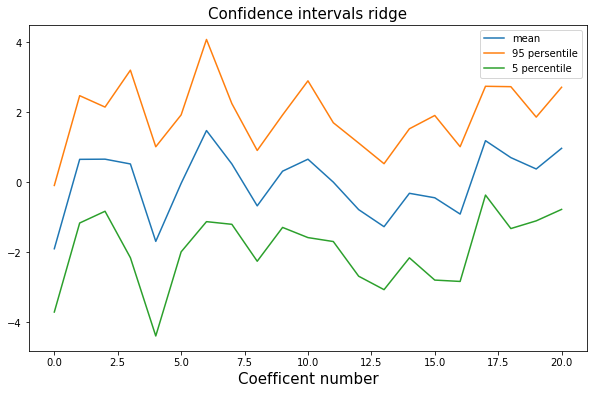

In [47]:
plt.figure(figsize = (10,6))
nrCoeff = X.shape[1]
x = np.arange(nrCoeff)
m = h = l = []

m = [B_r[i,:].mean() for i in range(nrCoeff)]
h = [ci(B_r[i,:])[1] for i in range(nrCoeff)]
l = [ci(B_r[i,:])[0] for i in range(nrCoeff)]
"""
for i in range(nrCoeff):
    m.append(B_r[i,:].mean())
    l.append(ci(B_r[i,:])[0])
    h.append(ci(B_r[i,:])[1])
"""
plt.title("Confidence intervals ridge", fontsize = 15)
plt.plot(m, label = "mean")
plt.plot(h, label = "95 persentile")
plt.plot(l , label = "5 percentile")
plt.xlabel("Coefficent number", fontsize = 15)
plt.legend()
plt.show()